#Naive Bayes

##Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

##Importing data

In [ ]:
data=pd.read_csv('sample_data/1.csv')

##Naive Bayes from scratch

###function to calculate accuracy

In [ ]:
def accuracy(pred, test):
  correct=0
  for i in range(len(pred)):
    if(pred[i]==test[i]):
      correct=correct+1
  return float(correct)/len(pred)

###Implementation of naive bayes

In [ ]:
def predict(data,size):

  #spliting data according to function parameter
  data_train,data_test=train_test_split(data,test_size=size)

  #store prediction
  pred=[]

  #for every test instance
  for i in data_test.index:
    instance=data.loc[i,:].to_frame().T
    #store probability of each class
    prob={}
    #for every class
    for j in data['class'].unique():
      #P(Y)
      prob[j]=float(data_train['class'].value_counts()[j])/data_train['class'].count()
      #for every column
      for k in instance.columns:
        #P(X|Y)
        if(k!='class' and instance.loc[instance.index[0],k]!='?'):# and instance.loc[0,k]!='?'
          prob[j]=prob[j]*(data_train[(data_train["class"]==j) & (data_train[k]==instance.loc[instance.index[0],k])].shape[0]/data_train['class'].value_counts()[j])
    #Findind max probability among all classes
    max,assign=0,0
    for key in prob:
      if(prob[key]>=max):
        max=prob[key]
        assign=key
    pred.append(assign)

  #finding accuracy
  a=accuracy(pred,list(data_test['class']))

  #Plotting confusion matrix
  ConfusionMatrixDisplay.from_predictions(list(data_test['class']),pred)
  plt.show()
  print("Accuracy: ",a)


###Output for different test-size

OUTPUT:

For test size  0.3


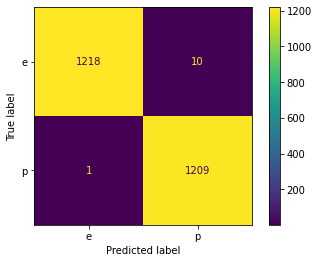

Accuracy:  0.9954881050041017

For test size  0.2


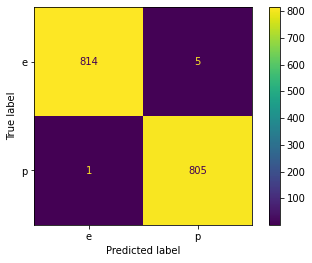

Accuracy:  0.9963076923076923

For test size  0.1


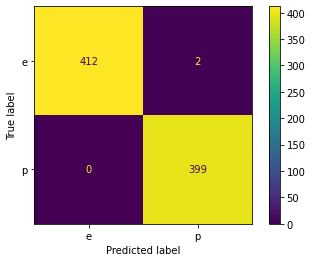

Accuracy:  0.997539975399754


In [ ]:
print("OUTPUT:")
test_size=[0.3,0.2,0.1]
for i in test_size:
  print("\nFor test size ",i)
  predict(data,i)

##Inbuilt Naive bayes

###Importing inbuilt library

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore')

###label encoding dataset

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column i.
for i in data.columns:
  data[i] = label_encoder.fit_transform(data[i])

###Spliting features and class label

In [ ]:
X,y=data.iloc[:,1:],data.iloc[:,:1]

###Output for different test-size

OUTPUT:

For test size  0.3


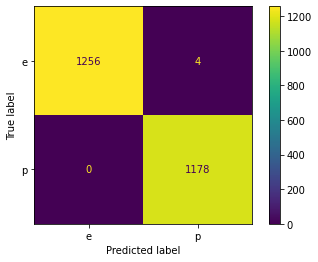

Accuracy:  0.9983593109105825

For test size  0.2


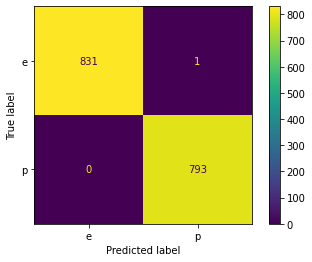

Accuracy:  0.9993846153846154

For test size  0.1


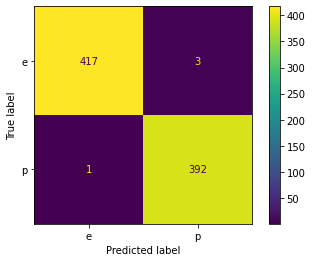

Accuracy:  0.995079950799508


In [ ]:
print("OUTPUT:")
test_size=[0.3,0.2,0.1]
for i in test_size:
  print("\nFor test size ",i)

  #Spliting to train and test set
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=i)

  #declaring fitting and making prediction using naive bayes
  clf = CategoricalNB(alpha=0,force_alpha=True)
  clf.fit(X_train,y_train.values.ravel())
  y_pred=clf.predict(X_test)

  #dsiplaying confusion matrix
  ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['e','p'])
  plt.show()

  #printing accuracy
  print("Accuracy: ",accuracy_score(y_test, y_pred))